# **Jupyter notebook (Caracterización de redes y topologías biológicas)**
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## **Práctica 2: Gráfos Aleatorios, Regulares, de Mundo pequeño y Libres de Escala**

### 1. Estudiar las propiedeades de un grafo aleatorio.

**a. Usando la función ``gnp_random_graph(n,p)`` de NetworkX, implementad una rutina Python ``L_C_Aleatorio`` que devuelva el valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos aleatorios de n nodos y probabilidad p.** El formato de la función debe ser:

``[l,c] = L_C_Aleatorio(n_graph,n,p)``

In [1]:
# importación de librerías
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pickle
import os.path
import string

* Definir K exactamente y explicar por qué puede ser interesante coger dicho valor (su media). 
* Explicar los diferentes pasos y por qué cogemos n-1 cuando el grafo no es conexo. 

La función ``L_C_Aleatorio`` se ha construido de manera que no solo devuelve los valores de C y L, sino también el grado medio (K) de cada uno de los grafos generados. 

In [2]:
# Definición de la función
def L_C_Aleatorio(n_graph, n, P):
    C = []
    L = []
    K = []
    for graph in range(n_graph):
        G = nx.gnp_random_graph(n, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        Degree = dict(nx.degree(G)).values()
        K.append(sum(Degree)/len(Degree))
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), round(sum(K)/len(K), 3)

**b. Usando la rutina anterior, dibujar el comportamiento de L, C para distintos valores de la probabilidad p y un número fijo de nodos.** 

* Tomad n=400, n_graph=20 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

* Dibujad una gráfica que describa el comportamiento de estos dos parámetros como función de p, usad escala logarítmica en el eje x.

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

En primer lugar, se va a llevar a cabo la simulación de 20 grafos aleatorios para cada una de las probabilidades dadas mediante la función ``L_C_Aleatorio``. Dicha función devolverá una tupla con la media de $L$, $C$ y $K$ para los 20 grafos. Dado que los tiempos de ejecución son extensos, se ha decido guardar los resultados en ficheros binarios mediante el módulo ``pickle`` de la librería estándar de Python con el protocolo establecido por defecto. 

In [3]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_random_metrics.pkl"):
    with open("G_random_metrics.pkl", "rb") as file:
        G_random_metrics = pickle.load(file)
else:    
    C_results_1 = []
    L_results_1 = []
    K_results_1 = []
    for P in Probs:
        Indiv_results_1 = L_C_Aleatorio(20, 400, P)
        C_results_1.append(Indiv_results_1[1])
        L_results_1.append(Indiv_results_1[0])
        K_results_1.append(Indiv_results_1[2])

    G_random_metrics = [C_results_1, L_results_1, K_results_1]
    
    with open("G_random_metrics.pkl", "wb") as file:
        pickle.dump(G_random_metrics, file, -1)

A continuación, se generan los gráficos correspondientes para el estudio del comportamiento de los parámetros en función de los distintos valores de $P$. Cabe destacar que el gráfico D se corresponde con la visualización del comportamiento de $C$ y $L$ de forma conjunta. Dado que el rango de valores en el que se distribuyen los dos parámetros es diferente, se han reescalado los valores de $L$ para que su rango de valores vaya de 0 a 1 mediante la división de los mismos por el máximo (en este caso, 399).

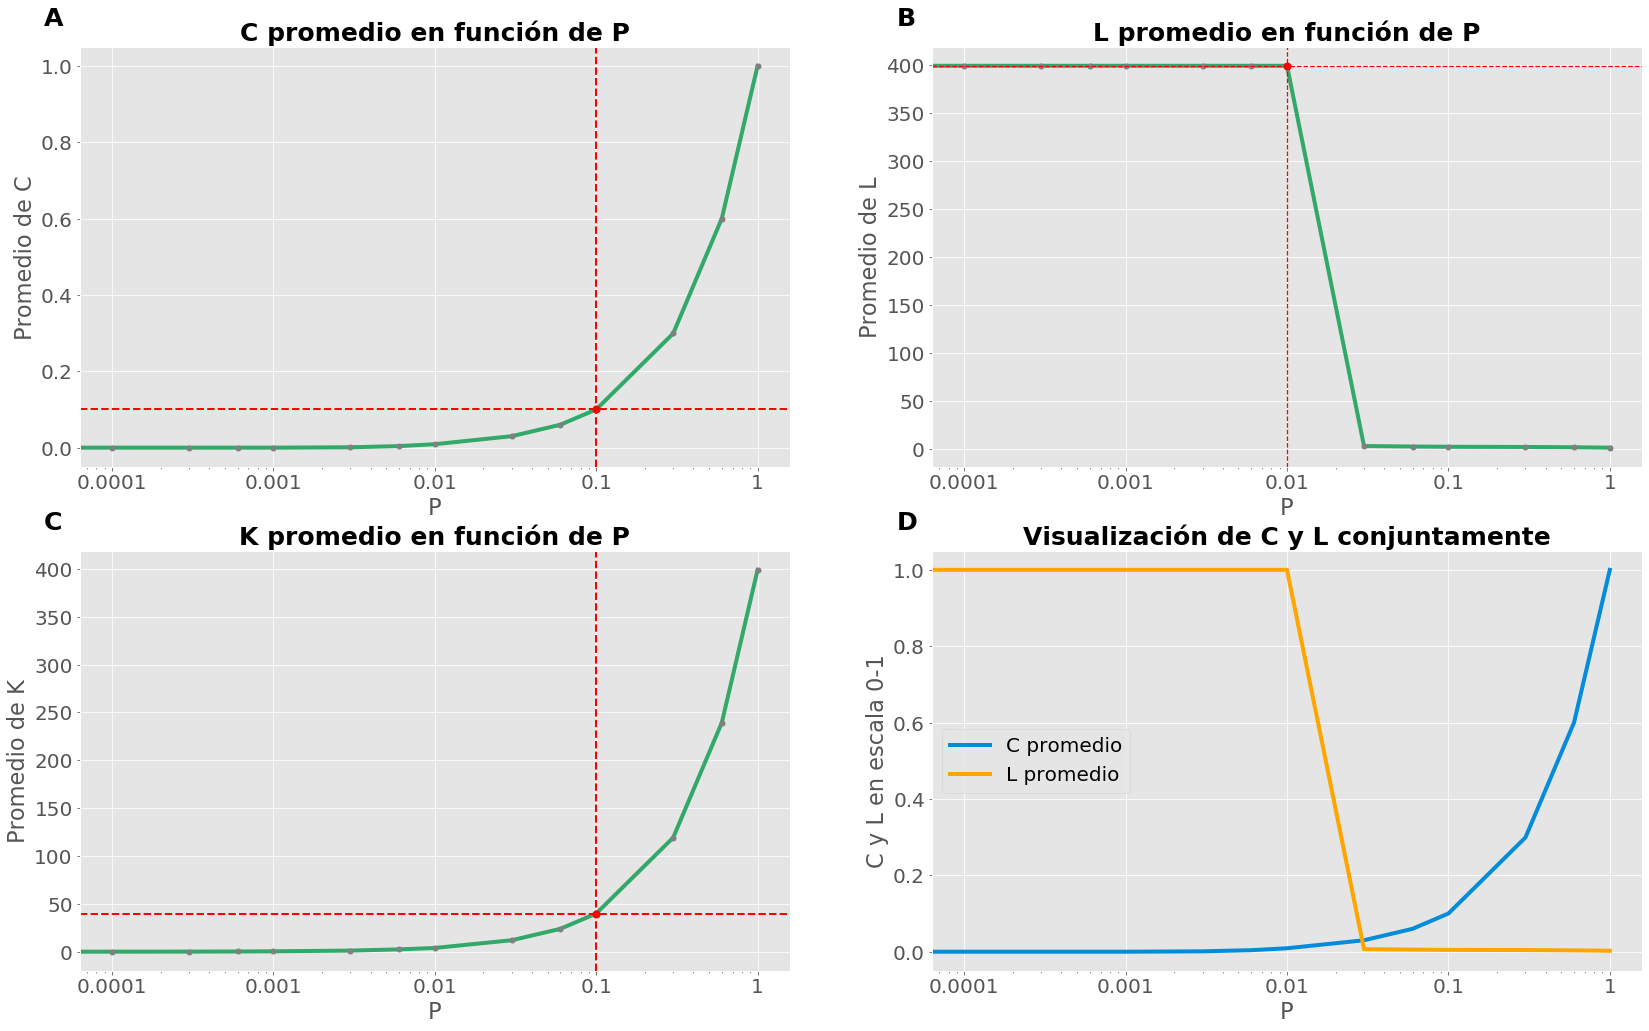

In [4]:
G_titles = ["C promedio en función de P", "L promedio en función de P", "K promedio en función de P",
            "Visualización de C y L conjuntamente"]
G_ylabels = ["Promedio de C", "Promedio de L", "Promedio de K", "C y L en escala 0-1"]
textSize = 25
lineW = 4

# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_random_metrics[nax], linewidth = lineW, color = "#32a869")
        ax.plot(Probs, G_random_metrics[nax], "o", color = "grey", markersize = 5)
    else:
        ax.plot(Probs, G_random_metrics[0], linewidth = lineW, color = "#048bd9", label = "C promedio")
        ax.plot(Probs, np.array(G_random_metrics[1])/max(G_random_metrics[1]), linewidth = lineW,
                color = "orange", label = "L promedio")
        ax.legend(loc = "best", prop = {'size': textSize * 0.8})
    ax.set_title(G_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, size = textSize + 0.2,
            weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    if (nax == 0) or (nax == 2):
        ax.plot(0.1, G_random_metrics[nax][10], 'o', markersize = 7, c = "r")
        ax.axvline(0.1, color = "red", linewidth = 2, linestyle = "dashed")
        ax.axhline(G_random_metrics[nax][10], color = "red", linewidth = 2, linestyle = "dashed")
    if nax == 1:
        ax.plot(0.01, G_random_metrics[nax][7], 'o', markersize = 7, c = "r")
        ax.axvline(0.01, color = "red", linewidth = 1.25, linestyle = "dashed")
        ax.axhline(G_random_metrics[nax][7], color = "red", linewidth = 1.25, linestyle = "dashed")

**\* Lo que marco con negrita es que lo tengo que revisar**

* **Igual es interesante mostrar cómo evoluciona L cuando el grafo es conexo?**
* **Igual podríamos marcar en los gráficos las probabilidades críticas**


Tomando como base el modelo de Erdös–Rényi para la generación de grafos aleatorios, $P$ es la probabilidad con la que existen ramas en el grafo. De tal forma, si $P = 0$, el grafo será completamente disconexo, ya que no existirá ninguna rama; mientras que, si $P = 1$, el grafo será completo, ya que existirán todas las posibles ramas entre los nodos $\left(\frac{N(N-1)}{2}\right)$ y cada uno de los nodos presentará el máximo grado posible $(N - 1)$.  De hecho, en esa situación el grafo será regular, ya que todos los nodos tendrán el mismo grado $N - 1$, presentando, por tanto, una distribución Delta de Dirac (mirar el gráfico A resultante de la siguiente celda).

Teniendo en cuenta estas premisas, se pueden interpretar los gráficos anteriores como la transición desde un grafo sin ninguna componente conexa (sin ninguna rama) en el que $C = 0$ y $L$ tiende a infinito, ya que se trata de una medida global que no puede ser calculada para grafos inconexos (por facilitar la visualización, se establece para grafos disconexos $L = N - 1$), hasta un grafo en el que todos los nodos están conectados por el número máximo de ramas y, por tanto, presenta $C = 1$, ya que estará formado un único clúster hiperconectado; y $L = 1$, ya que desde un nodo a cualquier otro la distancia siempre será 1. En resumen, en la Ecuación 1 se presentan los valores de los parámetros para $P = 1$ y $P = 0$:

$$
\begin{cases}
    K = 0, & C = 0, & L = N - 1, & \text{if } P = 0\\
    K = N - 1, & C = 1, & L = 1, & \text{if } P = 1
\end{cases}
\tag{1}
$$

siendo $N$ el numero de nodos del grafo, en este caso 400. 

En base a los gráficos, se puede determinar de forma aproximada la probabilidad crítica ($P_c$) a la que los parámetros $L$ y $C$ varían su comportamiento en grafos aleatorios con 400 nodos (ya que $P$ depende de $N$):
* El comportamiento de $C$ comienza a cambiar con $P_c = 0.01$ $(10^{-2})$, creciendo de forma más acentuada a partir de $P = 0.1$ $(10^{-1})$. Con $P_c = 0.01$, tanto el grado medio de los nodos (K) como el índice de clusterización (C) comienzan a aumentar exponencialmente, lo que significa que para dicho valor de $P$ se comienza a generar un único clúster, es decir, el grafo pasará a ser conexo, y acabará teniendo el mismo tamaño que el tamaño máximo del grafo ($N - 1$). Para valores menores de $P$, el grafo estará compuesto por $N - n$ clústeres, donde $n$ es el número de ramas, es decir, estará segmentado en $N - n$ componentes conexas (salvo cuando $P \approx 0$, si no se consideran componentes conexas a nodos sin vecinos).

* $L$ disminuye drásticamente a partir de  $P_c = 0.01$ $(10^{-2})$, llegando a establecerse cerca de 1 cuando $P \approx 0.05$. Esto se debe a que, para valores de $P$ por encima de 0.01 (aproximadamente), el grafo pasa a ser conexo y, por tanto, $L$ deja de ser igual a $N - 1$; mientras que cuando $P \approx 0.05$, el grafo está suficientemente conectado como para hacer que $L$ tienda a acercarse cada vez más a 1. 

**Con esta información, se puede observar que es aproximadamente en la franja $0.01 < P < 0.05$ cuando tanto $L$ como $C$ presentan valores pequeños, característica inherente de los grafos aleatorios.**

También es posible estudiar el comportamiento de $K$ con respecto a $P$. Como se puede observar, la evolución de $K$ es exactamente la misma a la de $C$, lo cual es lógico por el hecho de que, para grafos aleatorios, ambos parámetros miden lo mismo, pero en escalas distintas: dado que el número de ramas aumenta conforme aumenta $P$ sin que exista ningún tipo de unión preferente, tanto $K$ como $C$ serán mayores y presentarán la misma curva de crecimiento, ya que $C = P = \frac{K}{N-1}$. Esto nos indica que, en grafos aleatorios, $P$ y $K$ son equivalentes, es decir, es equivalente decir que la estructura del grafo evoluciona en función de $P$ o de $K$. 



Gracias al hecho de poder relacionar $P$ con $K$ mediante la expresión $P = \frac{K}{N-1}$, se puede determinar $P$ de forma analítica y con mayor precisión que a través de los gráficos. Erdös–Rényi demostraron que, para grafos aleatorios, cuando $K$ se acerca a 1 o es mayor que 1, se produce el aumento en el índice de clusterización (C) y, por tanto, un cambio en la estructura del grafo, pasando a estar compuesto, como se ha comentado anteriormente, por una componente gigante que acabará abarcando todo el grafo. Para valores de $K$ por debajo de 1, el grafo estará compuesto por $N - n$ clústeres, siendo la mayoría árboles y ciclos. Por lo tanto, $K \approx 1$ nos permitirá calcular la $P_c$ para $C$, siendo en este caso $P_c = \frac{1}{400-1} \approx 2.5·10^{-3}$. En el gráfico B siguiente se puede observar el punto de corte de $K = 1$, el cual, gracias a que se muestra con mayor aumento que los gráficos anteriores, parece coincidir con el punto inicial de crecimiento de $K$ y, por tanto, de $C$.

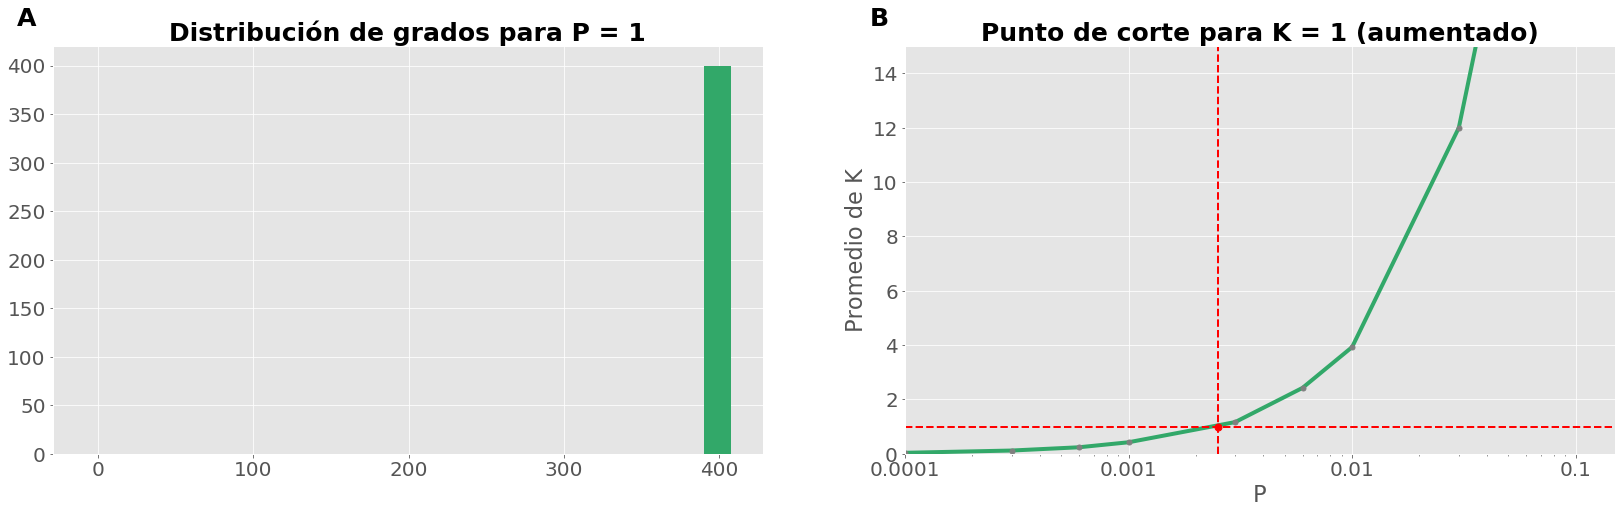

In [5]:
degree_P1 = nx.degree_histogram(nx.gnp_random_graph(400, 1))

G_titles_2 = ["Distribución de grados para P = 1", 
              "Punto de corte para K = 1 (aumentado)"]

fig, axs = plt.subplots(1, 2, figsize = (28, 7.5))

for nax, ax in enumerate(axs.flat):
    if nax == 0:
        ax.bar(range(len(degree_P1)), degree_P1, color = "#32a869", width = 17)
    else:
        ax.plot(Probs, G_random_metrics[2], linewidth = lineW, color = "#32a869")
        ax.plot(Probs, G_random_metrics[2], "o", color = "grey", markersize = 5)
        ax.plot(1/399, 1, 'o', markersize = 7, c = "r")
        ax.axvline(1/399, color = "red", linewidth = 2, linestyle = "dashed")
        ax.axhline(1, color = "red", linewidth = 2, linestyle = "dashed")        
        ax.set_xlim(0.0001, 0.15)
        ax.set_ylim(0, 15)
        ax.set_ylabel(G_ylabels[2], fontsize = textSize * 0.9)
        ax.set_xlabel("P", fontsize = textSize * 0.9)
        ax.set_xscale("log", nonposx = 'clip')
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    ax.set_title(G_titles_2[nax], fontweight = "bold", fontsize =  textSize)
    ax.tick_params(labelsize = textSize * 0.8)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, 
            size = textSize + 0.2, weight = 'bold')

Con el objetivo de determinar a partir de qué valores de $P$ dados el grafo está compuesto por una única componente conexa, el siguiente código muestra que es a partir de $P$ = 0.03. En dicho punto, $K \approx 12$, lo cual concuerda con los cálculos teóricos que determinan que el grafo se vuelve conexo cuando $K > ln(N)$, siendo en este caso $ln(400) = 5.99$. Dado que también se puede determinar $L$ analíticamente mediante la expresión $L = \frac{log(N)}{log(k)}$ cuando el grafo es conexo, en este punto, en el cual $P = 5.99/399 = 0.015$, el camino característico $L = 3.35$, es decir, presenta valores cercanos a 1 que tenderán a 1 cuando $K = N - 1$.

In [6]:
for i in Probs:
    if nx.is_connected(nx.gnp_random_graph(400, i)):
        print(">> P = {}: el grafo es conexo.".format(i))
    else:
        print(">> P = {}: el grafo no es conexo.".format(i))

>> P = 0: el grafo no es conexo.
>> P = 0.0001: el grafo no es conexo.
>> P = 0.0003: el grafo no es conexo.
>> P = 0.0006: el grafo no es conexo.
>> P = 0.001: el grafo no es conexo.
>> P = 0.003: el grafo no es conexo.
>> P = 0.006: el grafo no es conexo.
>> P = 0.01: el grafo no es conexo.
>> P = 0.03: el grafo es conexo.
>> P = 0.06: el grafo es conexo.
>> P = 0.1: el grafo es conexo.
>> P = 0.3: el grafo es conexo.
>> P = 0.6: el grafo es conexo.
>> P = 1.0: el grafo es conexo.


### 2. Redes regulares y de mundo pequeño

**a. Usando la función de NetworkX ``watts_strogatz_graph(n, k, p)`` implementad una rutina Python ``L_C_small_world(n_graph, n, k, p)`` que devuelva valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) para un conjunto de n_graph grafos de tipo Small World.** El formato de la función debe ser:

`` [l,c] = L_C_Small_World(n_graph,n,k,p)``

Nota: En el caso de que el grafo no sea conexo, usad el valor n-1 para L en ese grafo.

Al igual que en el caso anterior, la función ``L_C_Small_World(n_graph, n, K, P)`` no solo devuelve los valores de $C$ y $L$, sino también los de $K$, aunque en este caso es uno de los parámetros necesarios para la función ``watts_strogatz_graph`` y, por tanto, es introducido por el usuario. Además, una de las particularidades de este modelo es que $K$ inicial se mantiene constante para cualquier $P$, es decir, solo se modifica la posición de las ramas, no el número total de las mismas en el grafo. 

Dicha función parte de un grafo regular con un número de nodos y ramas especificado y, en función de $P$ (probabilidad de cambiar de posición cada una de las ramas), la posición de éstas varía siguiendo una distribución aleatoria. Esta función no asegura que los grafos resultantes sean conexos, razón por la cual se decide coger $L = N - 1$ en dichos casos y, además, el número de ramas inicial se mantiene constante. 

In [7]:
def L_C_Small_World(n_graph, n, K, P):
    C = []
    L = []
    for graph in range(n_graph):
        G = nx.watts_strogatz_graph(n, K, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), K

**b. Usando la rutina anterior, generad una gráfica con el comportamiento de C y L para distintos valores de la probabilidad p y un número fijo de nodos y ramas.** 

* Tomad N=400, k=8 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.].

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C? ¿Entre que valores de p dirías que está la zona de Small-World para estos valores de N y k. ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

* Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas.

* Con los datos que obtuviste en la práctica 1. ¿Dirías que la red de interacción de proteínas del _Caernobidis elegans_ puede ser considerada una red de mundo pequeño? Razona la respuesta.

In [8]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_SW_metrics.pkl"):
    with open("G_SW_metrics.pkl", "rb") as file:
        G_SW_metrics = pickle.load(file)
else:    
    C_results_2 = []
    L_results_2 = []
    K_results_2 = []
    for P in Probs:
        Indiv_results_2 = L_C_Small_World(20, 400, 8, P)
        C_results_2.append(Indiv_results_2[1])
        L_results_2.append(Indiv_results_2[0])
        K_results_2.append(Indiv_results_2[2])
    
    G_SW_metrics = [C_results_2, L_results_2, K_results_2]
    
    with open("G_SW_metrics.pkl", "wb") as file:
        pickle.dump(G_SW_metrics, file, -1)

Al igual que en el caso de los grafos aleatorios, el gráfico D se corresponde con la visualización conjunta de los valores promedio de $L$ y $C$ mediante el reescalado de los valores de $L$ obtenido de la división de estos por su máximo (en este caso, 25.439).

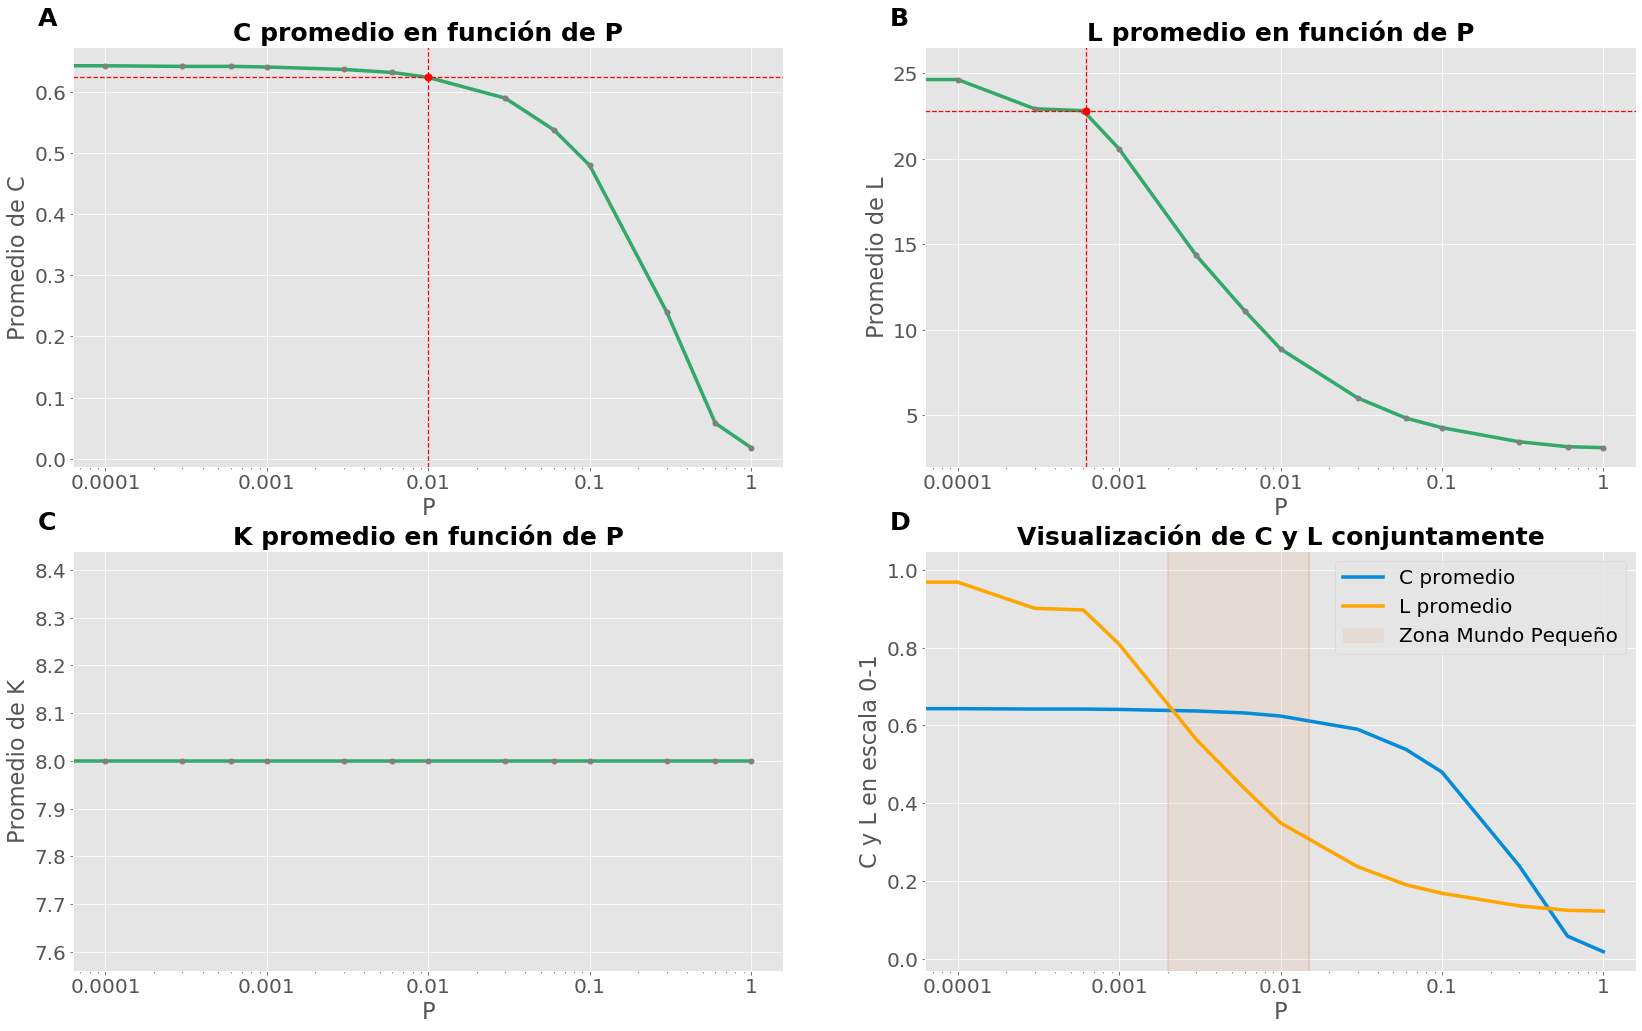

In [20]:
P1 = 0.002
P2 = 0.015
# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_SW_metrics[nax], linewidth = lineW, color = "#32a869")
        ax.plot(Probs, G_SW_metrics[nax], "o", color = "grey", markersize = 5)
    else:
        ax.plot(Probs, G_SW_metrics[0], linewidth = lineW, color = "#048bd9", label = "C promedio")
        ax.plot(Probs, np.array(G_SW_metrics[1])/max(G_SW_metrics[1]), linewidth = lineW, 
                color = "orange", label = "L promedio")
        ax.axvline(P1, linewidth = 2, alpha = 0.2, color = "#eb7a42")
        ax.axvline(P2, linewidth = 2, alpha = 0.2, color = "#eb7a42")
        ax.axvspan(P1, P2, alpha = 0.1, color = "#eb7a42", label = "Zona Mundo Pequeño")
        ax.legend(loc = "best", prop = {'size': textSize * 0.8})
    ax.set_title(G_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, size = textSize + 0.2,
            weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    if nax == 0:
        ax.plot(0.01, G_SW_metrics[nax][7], 'o', markersize = 7, c = "r")
        ax.axvline(0.01, color = "red", linewidth = 1.25, linestyle = "dashed")
        ax.axhline(G_SW_metrics[nax][7], color = "red", linewidth = 1.25, linestyle = "dashed")
    if nax == 1:
        ax.plot(0.000625, G_SW_metrics[nax][3], 'o', markersize = 7, c = "r")
        ax.axvline(0.000625, color = "red", linewidth = 1.25, linestyle = "dashed")
        ax.axhline(G_SW_metrics[nax][3], color = "red", linewidth = 1.25, linestyle = "dashed")

### **Dudas**

* En las diapositivas dice que se produce la transición de L cuando P > 1/NK, sin embargo, tengo apuntado que el número de atajos de un nodo es PNK/2, lo cual, si despejásemos P en 1 = PNK/2, sería P = 2/NK. Creo que la diferencia está en definir K como 2K o como K, lo cual es importante. La diferencia entre ambos viene en si tienes en cuenta en el sustrato inicial los vecinos de un lado de cada nodo o de los dos nodos. Es una gilipollez, pero estaría bien saber a qué valor se refiere este hombre en los apuntes, ya que, calculando P = 2/NK, sale p = 0.000625,l lo cual encaja perfectamente con el momento en el que L comienza a caer. **Este hombre simplemente dijo que tuviéramos cuidado, que en unos libros se definía de una forma y en otros de otra, pero no dio indicaciones de en que hay que basarse para coger uno u otro. En este caso, el criterio que deberíamos usar yo creo que es P = 2/NK porque sale de perlas y ya ta.**
* Respecto a la zona de mundo pequeño, no sé muy bien cómo determinarla de forma exacta, aproxidamanete me sale eso. **Sin problema, lo mismo me pasó a mi...**

_____________________________________________________________


En el caso del modelo de Watts y Strogatz para la generación de Redes de Mundo Pequeño, se parte de un anillo (grafo regular) que debe cumplir la condición $N >> K >> log(N)$ para que el grafo sea poco denso, pero conexo. En él, la posición de las ramas se modificará o no en función de la probabilidad $P$, evitando ramas dobles y autoconexiones. 

* En el caso de que $P = 0$, ninguna de las ramas del sustrato inicial se modificará y el grafo será regular, cuyos nodos estarán conectados con sus $2K$ vecinos a izquierda y derecha. En este contexto: el grado medio será igual a $K$, en este caso 8; y la distribución de grados será una Delta de Dirac (mirar gráfico A resultante de la siguiente celda). Además, tanto $L$ como $C$ presentarán valores altos, propios de los grafos regulares.

* Por el contrario, cuando $P = 1$, todas las ramas del grafo habrán sido cambiadas aleatoriamente, de forma que se obtendrá un grafo aleatorio con valores $L$ y $C$ bajos, y con una distribución de grados Binomial (de Poisson cuando $N$ tiende a infinito; mirar gráfico B resultante de la siguiente celda). 

Por lo tanto, los gráficos anteriores se pueden interpretar como la progresión de las métricas durante la transición desde un grafo regular ($P = 1$) a un grafo aleatorio ($P = 0$) mediante la modificación de la posición de las ramas, pero sin variar el grado medio del grafo. 

$$
\begin{cases}
    K = K, & C \approx 0.5-1, & L = \frac{N}{2K}, & \text{if } P = 0\\
    K = K, & C \approx 0, & L \approx log(N), & \text{if } P = 1
\end{cases}
\tag{2}
$$

Es para valores intermedios de $P$ la zona en la que se encuentran las Redes de Mundo Pequeño, las cuales se caracterizan por presentar tanto características propias de grafos aleatorios como de grafos regulares. Se puede definir la **zona de mundo pequeño** como aquella en la que $C$ es más o menos igual que en un grafo regular y $L$ es más o menos igual que en un grafo aleatorio, es decir, aquella con un índice de clusterización alto y un camino característico bajo. 

En base a los gráficos, se puede ver cómo efectivamente los valores de $L$ caen con $P$ más bajas que los valores de $C$, los cuales permanecen más o menos constantes hasta su caída con valores de $P$ más altos, indicando que el cambio de ramas no produce grandes efectos a nivel local. Por tanto, se cumple el comportamiento teórico esperado para este tipo de redes. Observando el gráfico D, se puede establecer de forma aproximada que la zona de mundo pequeño se encuentra entre $P_1 = 0.002$ y $P_2 = 0.01$ pues, para $P_1$, $L$ presenta valores relativamente bajos y, para $P_2$, comienza la caída de $C$ de forma más pronunciada. 

Dado el marco teórico del modelo de Watts y Strogatz, también se puede calcular analíticamente los valores de $C$ y $L$. Respecto al valor teórico de $P$ para el cual $L$ cae, se puede calcular mediante la expresión $P \geq \frac{2}{NK}$. En el caso de nuestra red, $P \geq 0.0003125$ $(10^{-3.505})$ |||| $P \geq 0.000625$ $(10^{-6.25})$. El evento que se produce en dicho punto es la aparición de un atajo, es decir, una rama que conecta dos agrupaciones de nodos distintos, haciendo que la distancia entre los nodos decremente rápidamente. Además, es llamativo ver cómo evoluciona $L$ antes y después de dicho punto: para valores previos a $P_c$, L cae de forma lineal, mientras que a partir de dicho punto, el descenso se vuelve mucho más pronunciado (caída logarítmica).

Respecto al valor teórico de $P$ para el que se ve afectado $C$, se sabe que el valor de $C$ sigue la expresión $C = \frac{3(K-1)}{2(2K-1)}(1-3)^3$. 

**LA ÚLTIMA LÍNEA, ¿NO SERÍA (1-P)³? EN LUGAR DE (1 - 3)³. PREGUNTO. ESO ES QUE LO HE LEÍDO POR AHÍ, PERO SEGÚN LA DIAPO SERÍA:**

Respecto al valor teórico de $P$ para el que se ve afectado $C$, se sabe que el valor de $C$ sigue la expresión $C = \frac{3(K-1)}{2(2K-1) + 8PK² + 4P² K²}$.

**HE ESTADO BUSCANDO ACERCA DE PROBABILIDADES CRÍTICAS, PERO NADA... DE HECHO, MALAS NOTICIAS. TE SUBO EL NATURE QUE HABLA DEL SIGUIENTE PÁRRAFO:**

On the contrary, Fig. 2 reveals that there is a broad interval of p over which L(p) is almost as small as Lrandom yet C(p) $\geq$ Crandom. These small-world networks result from the immediate drop in L(p) caused by the introduction of a few long-range edges. Such ‘short cuts’ connect vertices that would otherwise be much farther apart than Lrandom. For small p, each short cut has a highly nonlinear effect on L, contracting the distance not just between the pair of vertices that it connects, but between their immediate neighbourhoods, neighbourhoods of neighbourhoods and so on. By contrast, an edge removed from a clustered neighbourhood to make a short cut has, at most, a linear effect on C; hence C(p)remains practically unchanged for small p even though L(p) drops rapidly. The important implication here is that at the local level(as reflected by C(p)), the transition to a small world is almost **undetectable**.

**########################################**

Como se puede observar en la primera gráfica, el comportamiento de C cambia para $P = 0.01$ $(10^{-1})$.
Como se puede observar en la segunda gráfica, el comportamiento de L cambia para $P = 0.001$ $(10^{-3})$.

Por otro lado, se cumple el comportamiento teórico esperado para las redes de mundo pequeño: en cuanto P aumenta un poco, el camino característico baja mucho, mientras que el índice de clusterización se mantiene y cae con valores de P mayores.

La **zona de mundo pequeño** se define como aquella en la que C es más o menos igual que en un grafo regular y L es más o menos igual que en un grafo aleatorio. Otra definición es aquella zona en la que hay una clusterización alta y un camino característico bajo. De acuerdo a estas definiciones y a la visualización de la evolución de los parámetros C y L de forma conjunta (gráfica D), se podría decir que la zona de mundo pequeño es aquella ubicada aproximadamente entre los valores de $P = 10^{-3}$ y $P = 10^{-1}$.

El valor teórico de P para el cual se produce la transición de L es P = 1 / kN = 1 / (8·400) = 0.0003125 = $10^{-3.505}$. Como se ha dicho previamente, el cambio de comportamiento de L más drástico se produce a un valor de P = $10^{-3}$, de forma que el valor teórico y el observado son muy parecidos.

Respecto a la comparación de las gráficas obtenidas con las teóricas (diapositiva 36 del tema "Grafos aleatorios, grafos regulares y redes de mundo pequeño"), hay que destacar que son muy parecidas, si bien en las teóricas el camino característico cae antes y se parte de un índice de clusterización más alto.

Respecto a la red de Caernobidis Elegans, su C era de 0.075708 y, al no ser dirigido, su L sería de 1386. De acuerdo a estos valores y a lo observado en las gráficas teóricas y de estudio, yo creo que no se trataría de una red de mundo pequeño.

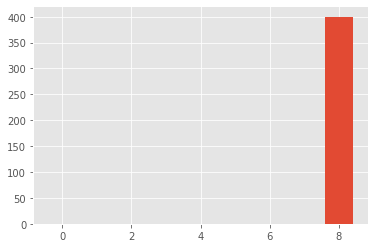

<BarContainer object of 20 artists>

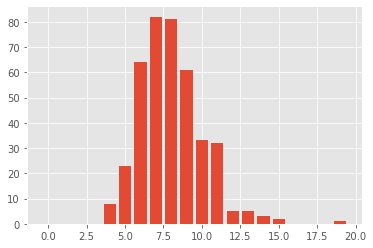

In [10]:
degree_P2 = nx.degree_histogram(nx.watts_strogatz_graph(400, 8, 0))
degree_P3 = nx.degree_histogram(nx.watts_strogatz_graph(400, 8, 1))
plt.bar(range(len(degree_P2)), degree_P2)
plt.show();
plt.bar(range(len(degree_P3)), degree_P3)

### 3. Redes libres de Escala

**a. Generad una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)).** Calculad los valores de L, C y la distribución de grado de los nodos. Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [11]:
if os.path.isfile("G_SF_metrics.pkl"):
    with open("G_SF_metrics.pkl", "rb") as file:
        G_SF_metrics = pickle.load(file)
else:
    G_SF = nx.barabasi_albert_graph(10000, 10)
    C_SF = nx.average_clustering(G_SF)
    L_SF = nx.average_shortest_path_length(G_SF)
    m_SF = nx.number_of_edges(G_SF)
    Degree_dist_SF = nx.degree_histogram(G_SF)
    
    G_SF_metrics = [C_SF, L_SF, m_SF, Degree_dist_SF]
    
    with open("G_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_SF_metrics, file, -1)

In [12]:
if os.path.isfile("G_random_SF_metrics.pkl"):
    with open("G_random_SF_metrics.pkl", "rb") as file:
        G_random_SF_metrics = pickle.load(file)
else:
    G_AL = nx.gnm_random_graph(10000, G_SF_metrics[2])
    C_AL = nx.average_clustering(G_AL)
    L_AL = nx.average_shortest_path_length(G_AL)
    Degree_dist_AL = nx.degree_histogram(G_AL)
    
    G_random_SF_metrics = [C_AL, L_AL, Degree_dist_AL]
    
    with open("G_random_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_random_SF_metrics, file, -1)


 Las gráficas A y B corresponden a la red libre de escala, mientras que las C y D corresponden a la aleatoria 
 equivalente.


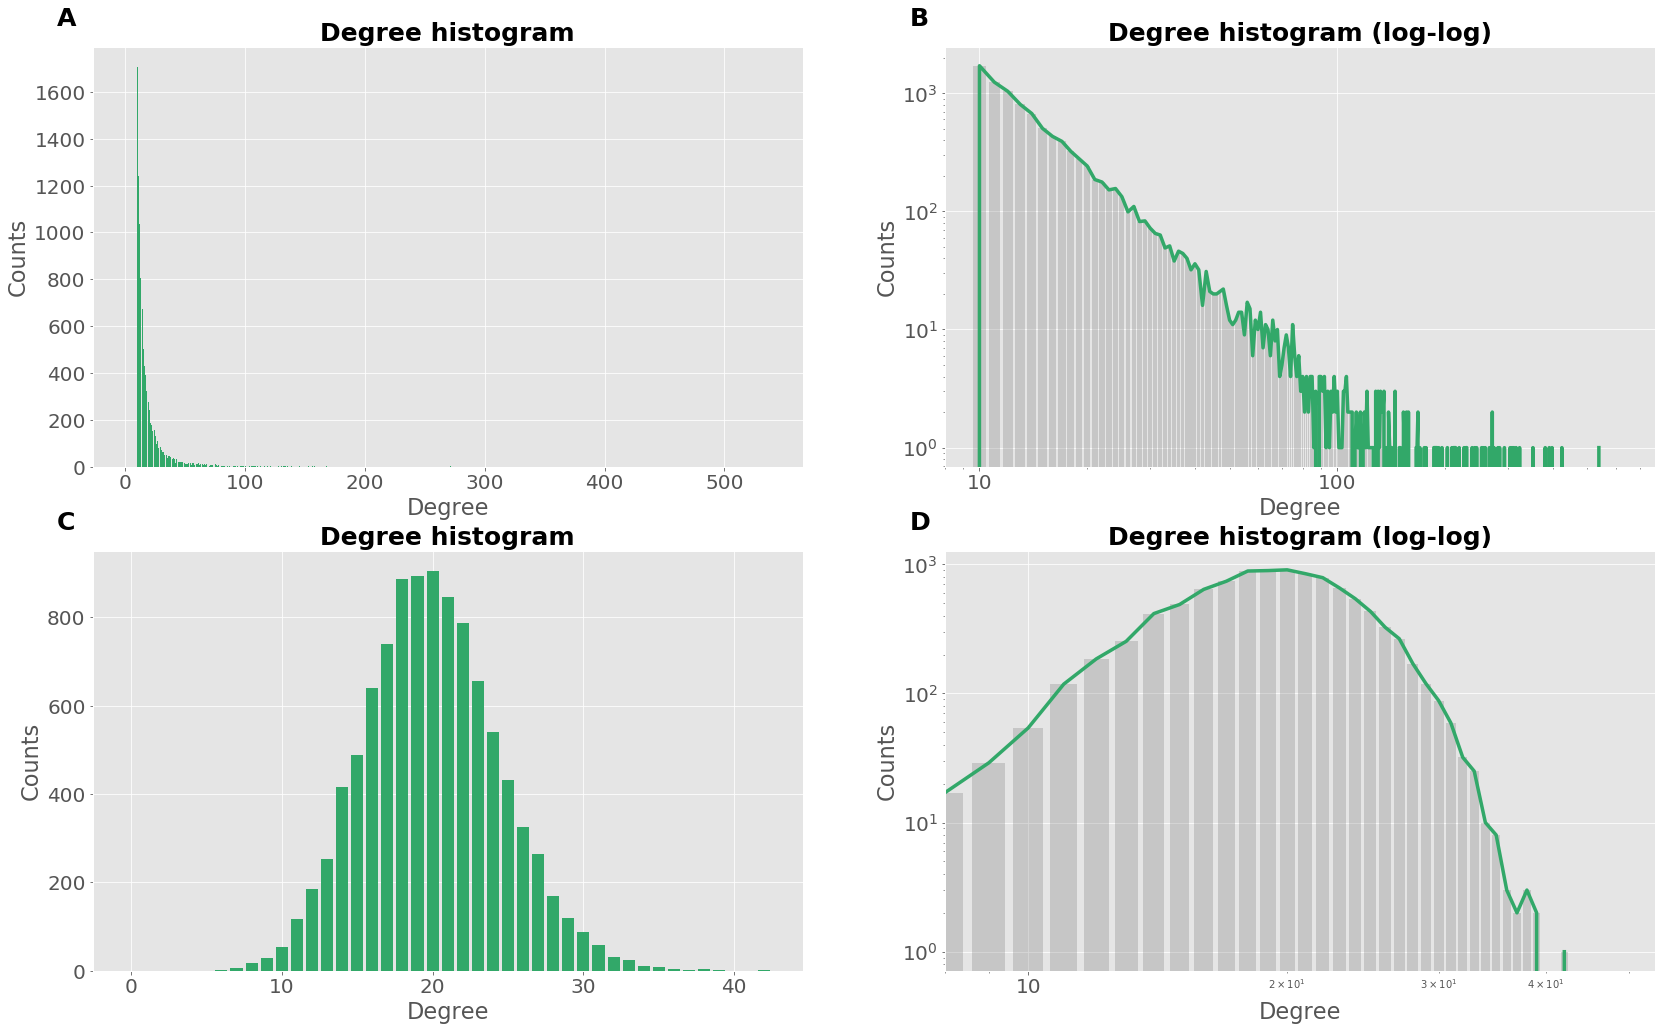

In [15]:
fig, axs = plt.subplots(2, 2, figsize = (28, 17))
textSize = 25
lineW = 3.5

Degree_dists = [G_SF_metrics[3], G_SF_metrics[3], G_random_SF_metrics[2], G_random_SF_metrics[2]]

print("\n Las gráficas A y B corresponden a la red libre de escala, mientras que las C y D corresponden a la",
      "aleatoria \n equivalente.")

for nax, ax in enumerate(axs.flat):
    if (nax == 0) or (nax == 2):
        ax.bar(range(len(Degree_dists[nax])), Degree_dists[nax], color = "#32a869")
        ax.set_title("Degree histogram", fontweight = "bold", fontsize =  textSize)
    elif (nax == 1) or (nax == 3):
        ax.bar(range(len(Degree_dists[nax])), Degree_dists[nax], color = "grey", alpha = 0.3)
        ax.plot(range(len(Degree_dists[nax])), Degree_dists[nax], linewidth = lineW, color = "#32a869")
        ax.set_title("Degree histogram (log-log)", fontweight = "bold", fontsize =  textSize)
        ax.set_xscale("log", nonposx='clip')
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(8)
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))    
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Counts", fontsize = textSize * 0.9)
    ax.set_xlabel("Degree", fontsize = textSize * 0.9)  
    ax.tick_params(labelsize = textSize * 0.8)

In [14]:
print("El índice de clusterización de la red libre de escala creada es:", G_SF_metrics[0])
print("El camino característico de la red libre de escala creada es:", G_SF_metrics[1], "\n")
print("El índice de clusterización de la red aleatoria equivalente a la libre de escala creada es:",
      G_random_SF_metrics[0])
print("El camino característico de la red aleatoria equivalente a la libre de escala creada es:",
      G_random_SF_metrics[1])

El índice de clusterización de la red libre de escala creada es: 0.010585222161397909
El camino característico de la red libre de escala creada es: 3.0729635163516353 

El índice de clusterización de la red aleatoria equivalente a la libre de escala creada es: 0.0018992100687198932
El camino característico de la red aleatoria equivalente a la libre de escala creada es: 3.4032812681268125


El índice de clusterización de la red libre de escala es un orden de magnitud mayor que el de la red aleatoria equivalente, de forma que hay un sesgo en la misma; mientras que el camino característico de la red libre de escala es más pequeño que el de la red aleatoria equivalente. Las propiedades de las redes libres de escala son: camino característico corto, incluso más que en el grafo aleatorio equivalente; índice de clusterización pequeño y decreciente (a mayor número de nodos). Así, ambas propiedades se cumplen en el caso de la red libre de escala creada (comparada con la aleatoria equivalente).